In [157]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 2.0 MB/s eta 0:00:00


In [212]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb  # XGBoost library
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from datetime import datetime
from sklearn.multiclass import OneVsRestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [2]:
#Load the csv dataset
landslides = pd.read_csv("/Users/soumya/Desktop/jupytersou/Global_Landslide_Catalog_Export.csv")

In [3]:
print(landslides.head())

   source_name                                        source_link  event_id  \
0          AGU  https://blogs.agu.org/landslideblog/2008/10/14...       684   
1    Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...       956   
2     CBS News  https://www.cbsnews.com/news/dozens-missing-af...       973   
3      Reuters  https://in.reuters.com/article/idINIndia-41450...      1067   
4  The Freeman  http://www.philstar.com/cebu-news/621414/lands...      2603   

               event_date  event_time  \
0  08/01/2008 12:00:00 AM         NaN   
1  01/02/2009 02:00:00 AM         NaN   
2  01/19/2007 12:00:00 AM         NaN   
3  07/31/2009 12:00:00 AM         NaN   
4  10/16/2010 12:00:00 PM         NaN   

                                         event_title  \
0      Sigou Village, Loufan County, Shanxi Province   
1                                Lake Oswego, Oregon   
2  San Ramon district, 195 miles northeast of the...   
3                                   Dailekh district  

In [4]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

In [5]:
landslides.describe()

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


In [6]:
print(len(landslides))
print(len(landslides.columns))
print(landslides.columns)

11033
31
Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')


## EDA

In [7]:
# Summary statistics for numeric columns
print(landslides.describe())

           event_id  event_time  fatality_count  injury_count  \
count  11033.000000         0.0     9648.000000   5359.000000   
mean    5598.953141         NaN        3.219424      0.751819   
std     3249.228647         NaN       59.886178      8.458955   
min        1.000000         NaN        0.000000      0.000000   
25%     2785.000000         NaN        0.000000      0.000000   
50%     5563.000000         NaN        0.000000      0.000000   
75%     8435.000000         NaN        1.000000      0.000000   
max    11221.000000         NaN     5000.000000    374.000000   

       event_import_id  admin_division_population  gazeteer_distance  \
count      9471.000000               9.471000e+03        9471.000000   
mean       4798.563070               1.577600e+05          11.873689   
std        2789.125559               8.297345e+05          15.598228   
min        -111.167300               0.000000e+00           0.000030   
25%        2386.500000               1.963000e+03     

In [8]:
# Value counts for a categorical column (e.g., 'landslide_category')
print(landslides['landslide_category'].value_counts())

landslide              7648
mudslide               2100
rock_fall               671
complex                 232
debris_flow             194
other                    68
unknown                  38
riverbank_collapse       37
snow_avalanche           15
translational_slide       9
lahar                     7
earth_flow                7
creep                     5
topple                    1
Name: landslide_category, dtype: int64


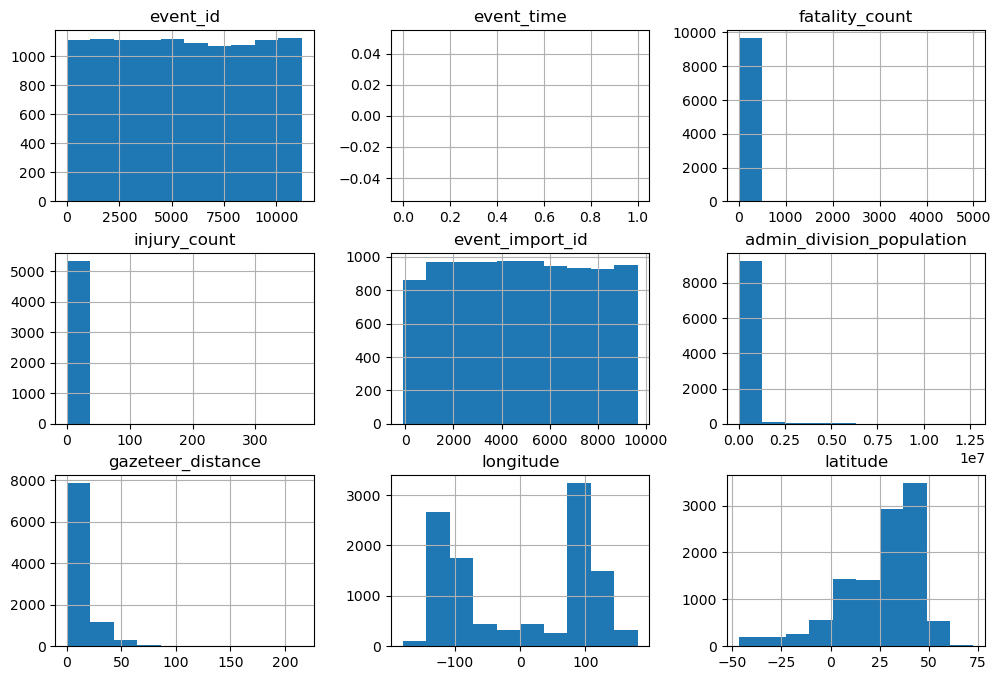

In [9]:
# Histograms for numeric columns
landslides.hist(figsize=(12, 8))
plt.show()

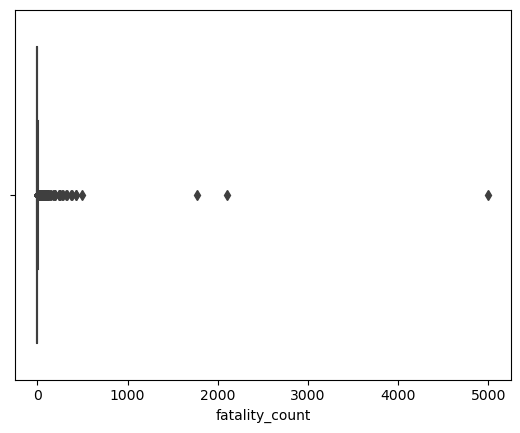

In [10]:
# Box plot for a numeric column (e.g., 'fatality_count')
sns.boxplot(data=landslides, x='fatality_count')
plt.show()

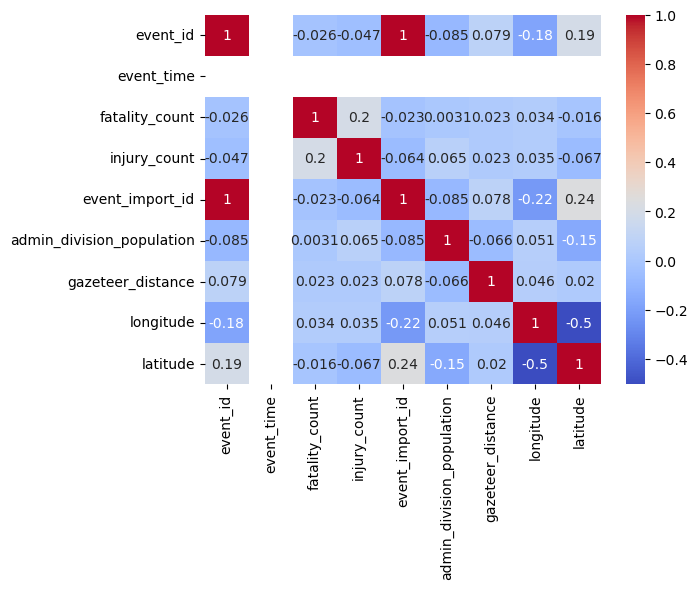

In [11]:
# Correlation heatmap
correlation_matrix = landslides.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Convert event_date to datetime
landslides['event_date'] = pd.to_datetime(landslides['event_date'])

# Create function to determine season from month  
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'

# Extract month from event_date and apply season function
landslides['event_month'] = landslides['event_date'].dt.month  
landslides['event_season'] = landslides['event_month'].apply(get_season)
# Print seasons    
print(landslides['event_season'].value_counts())

print(landslides)

summer    3431
winter    2710
spring    2626
autumn    2266
Name: event_season, dtype: int64
              source_name                                        source_link  \
0                     AGU  https://blogs.agu.org/landslideblog/2008/10/14...   
1               Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...   
2                CBS News  https://www.cbsnews.com/news/dozens-missing-af...   
3                 Reuters  https://in.reuters.com/article/idINIndia-41450...   
4             The Freeman  http://www.philstar.com/cebu-news/621414/lands...   
...                   ...                                                ...   
11028    The Jakarta Post  http://www.thejakartapost.com/news/2017/04/02/...   
11029     Greater Kashmir  http://www.greaterkashmir.com/news/jammu/lands...   
11030           NBC Daily  http://www.nbcdaily.com/separate-landslides-ki...   
11031  AGU Landslide Blog  http://blogs.agu.org/landslideblog/2017/05/02/...   
11032  The Times of India  

## Drop Unwanted Columns

In [13]:
# List of columns to remove
columns_to_remove = ['event_date', 'event_month','source_name', 'source_link', 'event_id', 'event_description', 'storm_name',
                     'photo_link', 'notes', 'event_import_source', 'event_import_id', 'submitted_date', 'created_date',
                     'last_edited_date', 'location_description', 'admin_division_name','admin_division_population', 'country_code', 'country_name', 'event_time' ]

# Remove the unwanted columns
landslides_drop = landslides.drop(columns=columns_to_remove)

# Save the cleaned dataset to a new CSV file
landslides_drop.to_csv("Global_Landslide_Catalog_Export_column_drop.csv", index=False)
landslides = pd.read_csv("/Users/soumya/Desktop/jupytersou/Global_Landslide_Catalog_Export_column_drop.csv")
print(landslides.head(5))

                                         event_title location_accuracy  \
0      Sigou Village, Loufan County, Shanxi Province           unknown   
1                                Lake Oswego, Oregon               5km   
2  San Ramon district, 195 miles northeast of the...              10km   
3                                   Dailekh district           unknown   
4                    sitio Bakilid in barangay Lahug               5km   

  landslide_category landslide_trigger landslide_size landslide_setting  \
0          landslide              rain          large              mine   
1           mudslide          downpour          small           unknown   
2          landslide          downpour          large           unknown   
3          landslide           monsoon         medium           unknown   
4          landslide  tropical_cyclone         medium           unknown   

   fatality_count  injury_count gazeteer_closest_point  gazeteer_distance  \
0            11.0          

In [14]:
print(len(landslides))
print(len(landslides.columns))
print(landslides.columns)

11033
13
Index(['event_title', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'gazeteer_closest_point',
       'gazeteer_distance', 'longitude', 'latitude', 'event_season'],
      dtype='object')


## Preprocessing Steps

In [15]:
# Check for missing values
missing_values = landslides.isnull().sum()
missing_values.head()
print(missing_values)

event_title                  0
location_accuracy            2
landslide_category           1
landslide_trigger           23
landslide_size               9
landslide_setting           69
fatality_count            1385
injury_count              5674
gazeteer_closest_point    1563
gazeteer_distance         1562
longitude                    0
latitude                     0
event_season                 0
dtype: int64


In [16]:
# Multiple Imputation Technique - SimpleImputer

# Impute missing values 
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(landslides)

# Columns with missing values
columns_with_missing_values = ['injury_count', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'fatality_count','gazeteer_closest_point', 'gazeteer_distance']

# Apply the imputer to fill missing values in specific columns
landslides[columns_with_missing_values] = imputer.fit_transform(landslides[columns_with_missing_values])


In [17]:
# Create a new DataFrame with the imputed data
imputed_landslides = pd.DataFrame(imputed_data, columns=list(landslides.columns))
print(imputed_landslides.isnull().sum())

event_title               0
location_accuracy         0
landslide_category        0
landslide_trigger         0
landslide_size            0
landslide_setting         0
fatality_count            0
injury_count              0
gazeteer_closest_point    0
gazeteer_distance         0
longitude                 0
latitude                  0
event_season              0
dtype: int64


In [18]:
# Create a dictionary to map the old landslide_category values to the new values
category_map = {
    "rock fall": "Falls",
    "snow_avalanche": "Falls",
    "topple": "Topples",
    "landslide": "Slides",
    "mudslide": "Slides",
    "translational slides": "Slides",
    "creep": "Slides",
    "debris flows": "Flows",
    "lahars": "Flows",
    "earth_flow": "Flows",
    "complex": "other",
    "other": "other",
    "unknown": "other",
    "riverbank_collapse": "other"
}

# Modify the landslide_category column using the category_map
imputed_landslides['landslide_category'] = imputed_landslides['landslide_category'].map(category_map)

# Save the modified DataFrame
imputed_landslides.to_csv("modified_landslide_category.csv", index=False)

In [19]:
# Group the DataFrame by the landslide_category column and count the occurrences of each category
category_counts = imputed_landslides.groupby('landslide_category').size()

In [20]:
# Check for duplicate rows
duplicate_rows = imputed_landslides[imputed_landslides.duplicated()]
# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows found")
else:
    print("No Duplicate Rows found.")

Duplicate Rows found


In [14]:
# Drop duplicate rows and keep the first occurrence
imputed_landslides = imputed_landslides.drop_duplicates()
# Reset the index if needed
imputed_landslides = imputed_landslides.reset_index(drop=True)
print(imputed_landslides.shape)
print(len(imputed_landslides.columns))
print(len(imputed_landslides))


(11009, 13)
13
11009


In [21]:
print(imputed_landslides.columns)

Index(['event_title', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'gazeteer_closest_point',
       'gazeteer_distance', 'longitude', 'latitude', 'event_season'],
      dtype='object')


## Feature Engineering

In [22]:
# Feature 1: Encode categorical features using LabelEncoder


# Encode categorical features using LabelEncoder
categorical_columns = imputed_landslides.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Encode each categorical column individually
for col in categorical_columns:
    imputed_landslides[col] = label_encoder.fit_transform(imputed_landslides[col])
    
imputed_landslides.drop(imputed_landslides[imputed_landslides['landslide_category'] == 5].index, inplace=True)

# Print the encoded landslide_category values
print(imputed_landslides['landslide_category'].value_counts())

2    9754
4     375
0      15
1       7
3       1
Name: landslide_category, dtype: int64


In [24]:
# Feature 2: Create a binary feature indicating whether there were fatalities
imputed_landslides['has_fatalities'] = imputed_landslides['fatality_count'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
# Feature Selection

# Separate features and target variable
X = imputed_landslides.drop(columns=['landslide_category'])  # Features
y = imputed_landslides['landslide_category']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SelectKBest to select the top k features based on ANOVA F-statistics
k = 8  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_train, y_train)
# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
print(selected_feature_names)

Index(['landslide_trigger', 'landslide_setting', 'fatality_count',
       'injury_count', 'gazeteer_distance', 'latitude', 'event_season',
       'has_fatalities'],
      dtype='object')


In [27]:
# REMOVE OUTLIERS

# Define a function to remove outliers using Z-Score
def remove_outliers_zscore(imputed_landslides, threshold=3):
    z_scores = np.abs(stats.zscore(imputed_landslides))
    imputed_landslides_no_outliers = imputed_landslides[(z_scores < threshold).all(axis=1)]
    return imputed_landslides_no_outliers

# Specify the columns where we want to detect and remove outliers
numeric_features = ['landslide_size', 'fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude']
#Remove outliers from the specified columns
imputed_landslides_no_outliers = remove_outliers_zscore(imputed_landslides[numeric_features])

# Merge the cleaned numeric features back with the original dataset
imputed_landslides_cleaned = pd.concat([imputed_landslides.drop(numeric_features, axis=1), imputed_landslides_no_outliers], axis=1)

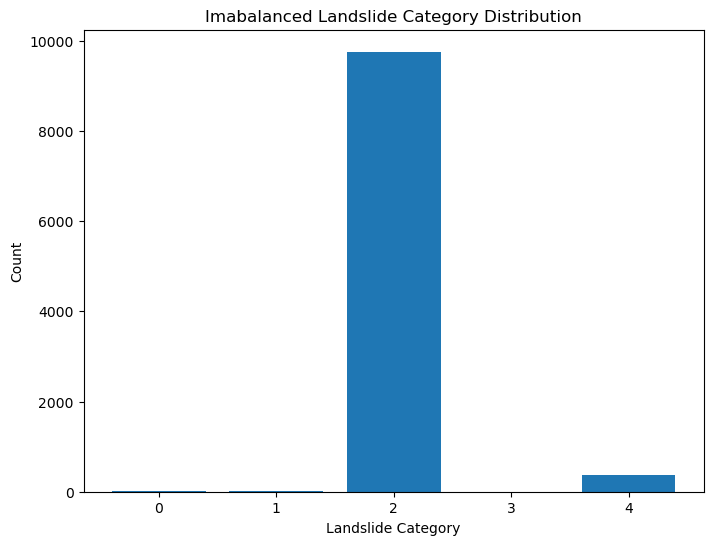

Landslide Category 2: Count 9754
Landslide Category 4: Count 375
Landslide Category 0: Count 15
Landslide Category 1: Count 7
Landslide Category 3: Count 1


In [28]:
# Check target variable is balanced or not

# Count the occurrences of each category in the target variable
category_counts = imputed_landslides_cleaned['landslide_category'].value_counts()
# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Landslide Category')
plt.ylabel('Count')
plt.title('Imabalanced Landslide Category Distribution')
plt.xticks(category_counts.index)
plt.show()

# Count and print each landslide category along with the count
category_counts = imputed_landslides_cleaned['landslide_category'].value_counts()
for category, count in category_counts.items():
    print(f"Landslide Category {category}: Count {count}")

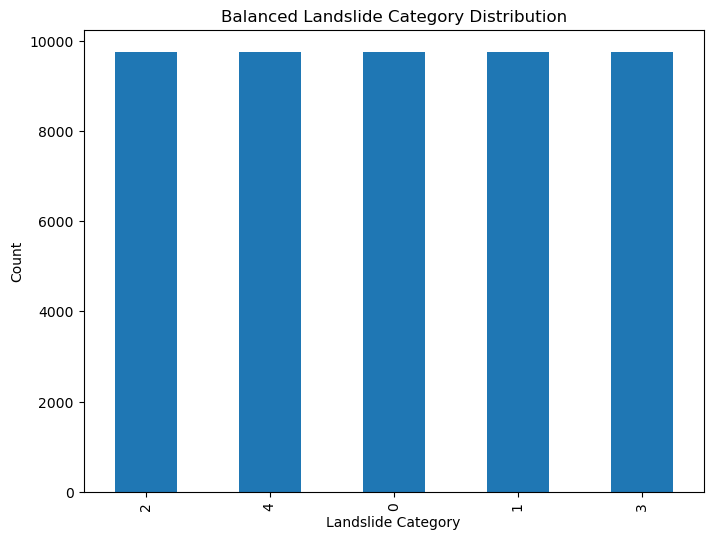

In [30]:
# Define features (X) and target variable (y)
X = imputed_landslides_cleaned.drop('landslide_category', axis=1) 
y = imputed_landslides_cleaned['landslide_category']
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Apply RandomOverSampler to balance the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)
# Create a DataFrame for the balanced data
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
# Create a bar plot to visualize the distribution of categories in the balanced data
plt.figure(figsize=(8, 6))
balanced_data['landslide_category'].value_counts().plot(kind='bar')
plt.xlabel('Landslide Category')
plt.ylabel('Count')
plt.title('Balanced Landslide Category Distribution')
plt.show()

## Data Splitting and Training

In [33]:
# Split the balanced dataset into features (X) and target variable (y)
X = balanced_data.drop('landslide_category', axis=1)  
y = balanced_data['landslide_category']
# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

columns_to_fill = ['landslide_size', 'fatality_count', 'injury_count', 'gazeteer_distance', 'longitude', 'latitude']

# Filling NaN values in numeric columns with mean values
balanced_data[columns_to_fill] = balanced_data[columns_to_fill].fillna(balanced_data[columns_to_fill].mean())
# Handle missing values by imputing with mean (you can use other strategies)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## Modelling

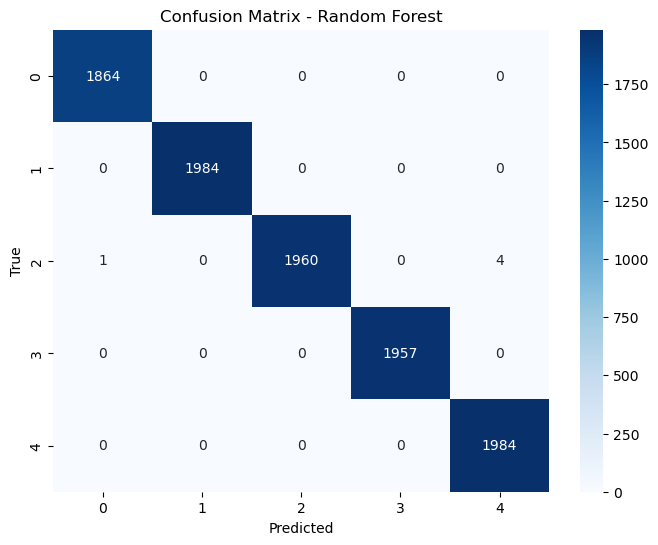

Classifier: Random Forest
Accuracy: 0.9994873897888046
F1 Score: 0.9994872835215829
ROC AUC Score: 0.9996813927510818
Precision: 0.9994903469071804
Recall: 0.9994910941475826
--------------------------------------


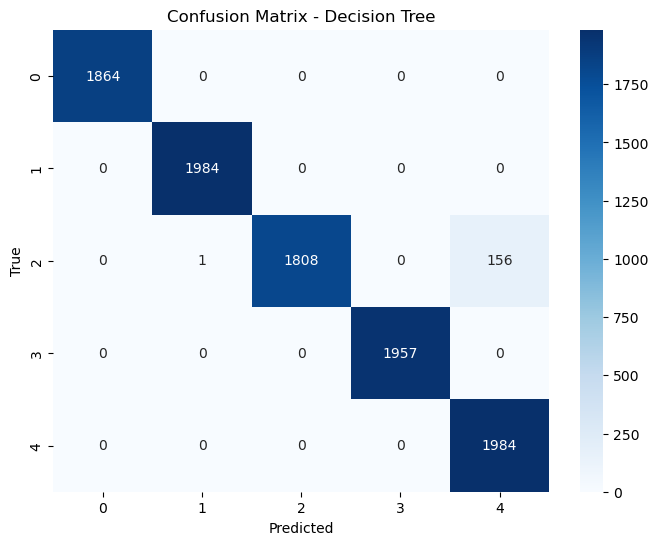

Classifier: Decision Tree
Accuracy: 0.9839040393684643
F1 Score: 0.9838716588714024
ROC AUC Score: 0.9899895860964563
Precision: 0.9853198050801574
Recall: 0.9840203562340968
--------------------------------------


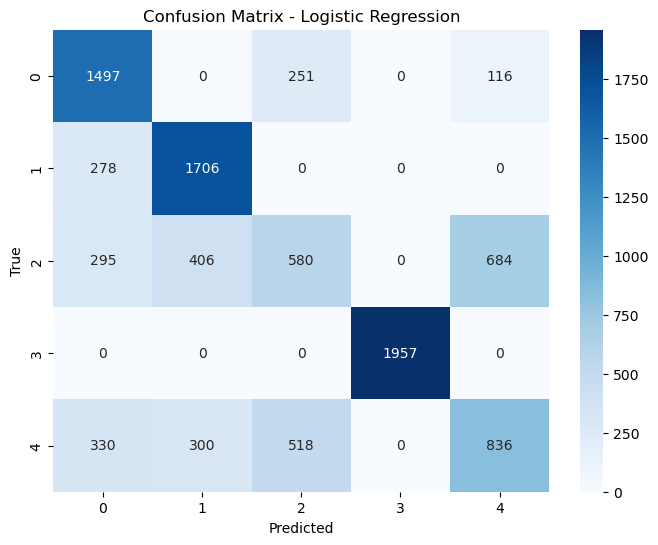

Classifier: Logistic Regression
Accuracy: 0.6741849497641993
F1 Score: 0.6571560013512439
ROC AUC Score: 0.7972526942598853
Precision: 0.6543994807573131
Recall: 0.6759053964769737
--------------------------------------


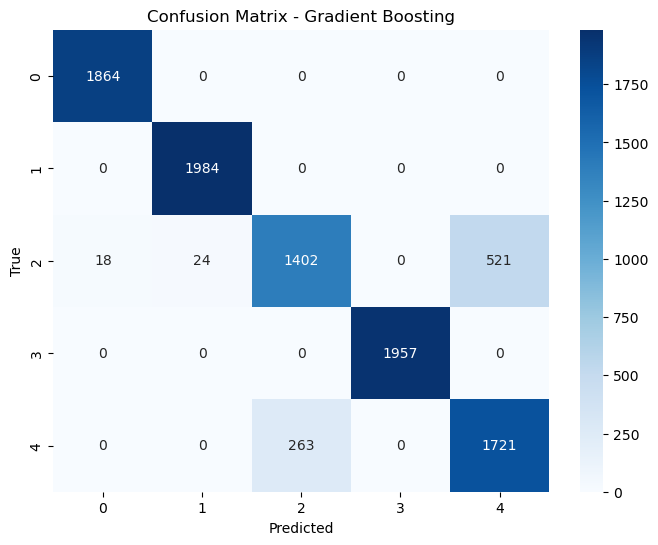

Classifier: Gradient Boosting
Accuracy: 0.9153167931105187
F1 Score: 0.9142828592846443
ROC AUC Score: 0.9474737015430218
Precision: 0.9176287511078908
Recall: 0.9161851042436181
--------------------------------------


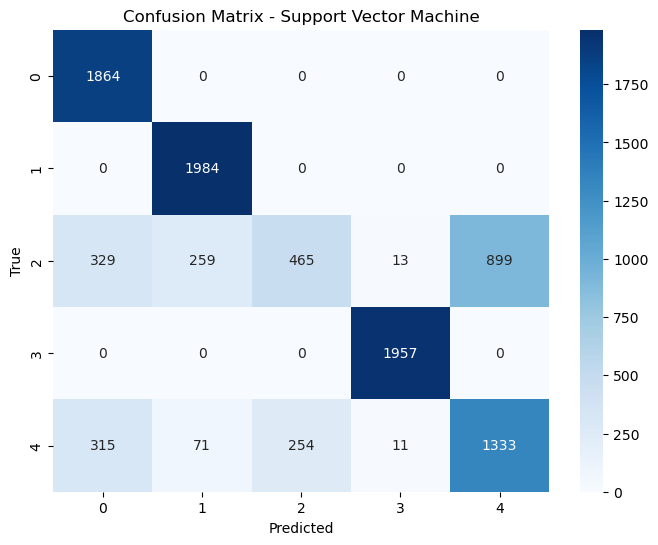

Classifier: Support Vector Machine
Accuracy: 0.7794750871437359
F1 Score: 0.7485779252960455
ROC AUC Score: 0.8633033258365815
Precision: 0.7664900384524884
Recall: 0.7817032442748092
--------------------------------------


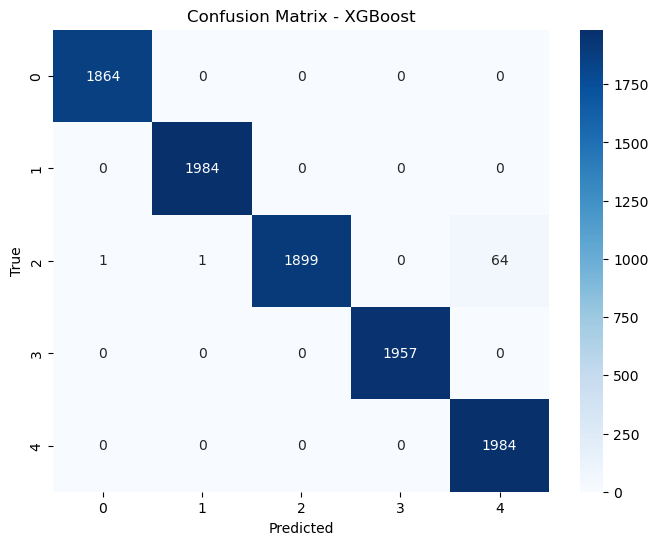

Classifier: XGBoost
Accuracy: 0.9932335452122206
F1 Score: 0.9932278585167301
ROC AUC Score: 0.9957919962662656
Precision: 0.9935420057265956
Recall: 0.9932824427480916
--------------------------------------
               Classifier  Accuracy  F1 Score  ROC AUC Score  Precision  \
0           Random Forest  0.999487  0.999487       0.999681   0.999490   
1           Decision Tree  0.983904  0.983872       0.989990   0.985320   
2     Logistic Regression  0.674185  0.657156       0.797253   0.654399   
3       Gradient Boosting  0.915317  0.914283       0.947474   0.917629   
4  Support Vector Machine  0.779475  0.748578       0.863303   0.766490   
5                 XGBoost  0.993234  0.993228       0.995792   0.993542   

     Recall  
0  0.999491  
1  0.984020  
2  0.675905  
3  0.916185  
4  0.781703  
5  0.993282  


In [34]:
# Dictionary to hold different classifiers
classifiers = {
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'Support Vector Machine': OneVsRestClassifier(SVC(random_state=42, probability=True)),
    'XGBoost': OneVsRestClassifier(XGBClassifier(random_state=42))
}

# Lists to store results
results = []
metrics = ['Classifier', 'Accuracy', 'F1 Score', 'ROC AUC Score', 'Precision', 'Recall']

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(label_binarize(y_test, classes=y.unique()), label_binarize(y_pred, classes=y.unique()), average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Append results to the list
    results.append([name, accuracy, f1, roc_auc, precision, recall])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print the evaluation metrics for each classifier
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("--------------------------------------")
    
# Create a pandas DataFrame for results
results_df = pd.DataFrame(results, columns=metrics)

# Display results table
print(results_df)

C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


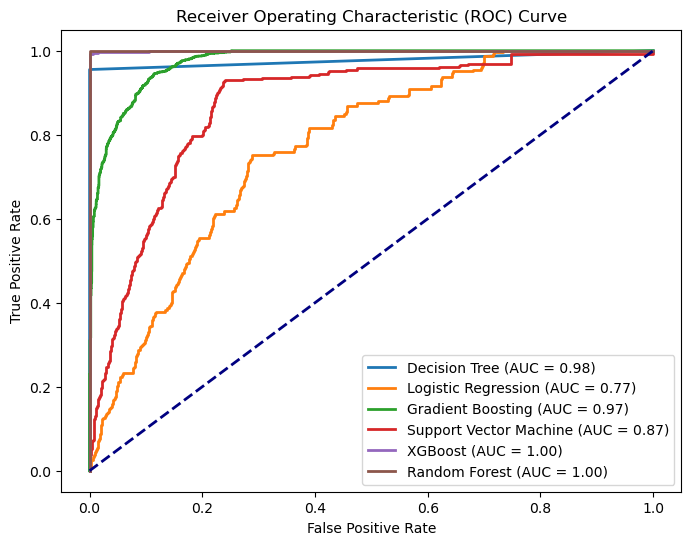

In [35]:
# Dictionary to hold different classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Create a figure and axes to plot ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for each classifier separately
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict probabilities on the test set (for computing ROC curve)
    y_probs = clf.predict_proba(X_test)
    
    # Get the index for class 2
    class_2_index = np.where(clf.classes_ == 2)[0][0]
    
    # Calculate false positive rate and true positive rate for class 2
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=clf.classes_)[:, class_2_index], y_probs[:, class_2_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Cross-validation results:
[0.99241337 0.99179824 0.98954275 0.98769735 0.98615952]
Mean Accuracy: 0.9895222472831658
--------------------------------------


C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression Cross-validation results:
[0.62866516 0.60149682 0.6223088  0.62958786 0.61420956]
Mean Accuracy: 0.6192536395324995
--------------------------------------
Gradient Boosting Cross-validation results:
[0.92895222 0.92843961 0.92700431 0.9167521  0.90434693]
Mean Accuracy: 0.921099036292803
--------------------------------------
Support Vector Machine Cross-validation results:
[0.80500308 0.79557105 0.79741644 0.78747181 0.78142301]
Mean Accuracy: 0.7933770760713552
--------------------------------------
XGBoost Cross-validation results:
[0.99343859 0.99374616 0.99220832 0.99261841 0.99046545]
Mean Accuracy: 0.9924953865080992
--------------------------------------
Random Forest Cross-validation results:
[0.99938487 0.99969243 0.99928235 0.99948739 0.99958991]
Mean Accuracy: 0.9994873897888047
--------------------------------------


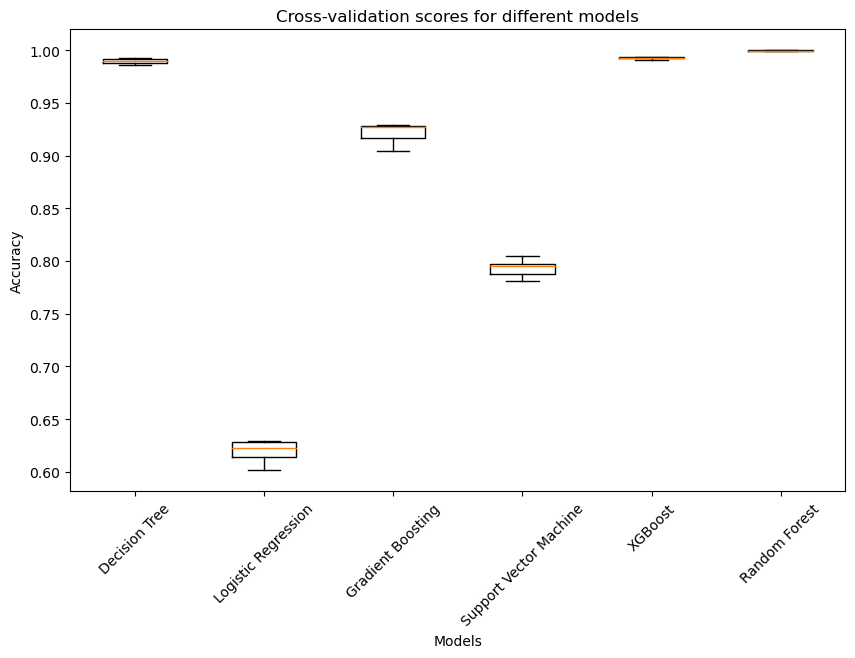

In [36]:
# Handle missing values by imputing with mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform cross-validation for each classifier
cv_results = {}
for name, clf in classifiers.items():
    # Perform cross-validation with 5 folds
    scores = cross_val_score(clf, X_imputed, y, cv=5, scoring='accuracy')
    cv_results[name] = scores
    
    # Print cross-validation results for each classifier
    print(f"{name} Cross-validation results:")
    print(scores)
    print(f"Mean Accuracy: {np.mean(scores)}")
    print("--------------------------------------")

# Plotting cross-validation results (same as before)
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values())
plt.xticks(range(1, len(classifiers) + 1), cv_results.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores for different models')
plt.show()


C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

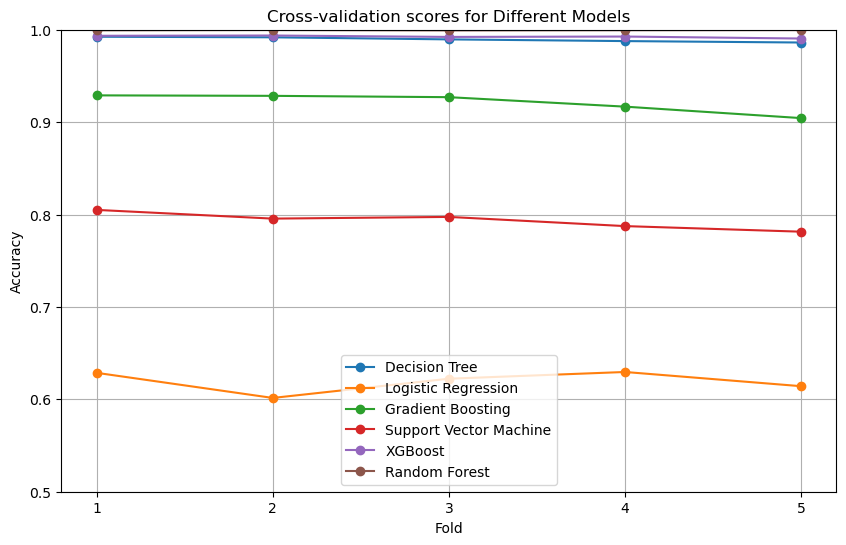

In [37]:
# Handle missing values by imputing with mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Set the number of folds for cross-validation
num_folds = 5

# Initialize a figure for plotting
plt.figure(figsize=(10, 6))

# Perform cross-validation and plot results for each classifier separately
for name, clf in classifiers.items():
    # Perform cross-validation with 5 folds
    scores = cross_val_score(clf, X_imputed, y, cv=num_folds, scoring='accuracy')
    
    # Plot cross-validation results for each fold
    plt.plot(range(1, num_folds + 1), scores, marker='o', label=name)

# Plot settings and labels
plt.title('Cross-validation scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis limit for better visualization
plt.xticks(range(1, num_folds + 1))
plt.legend()
plt.grid(True)
plt.show()

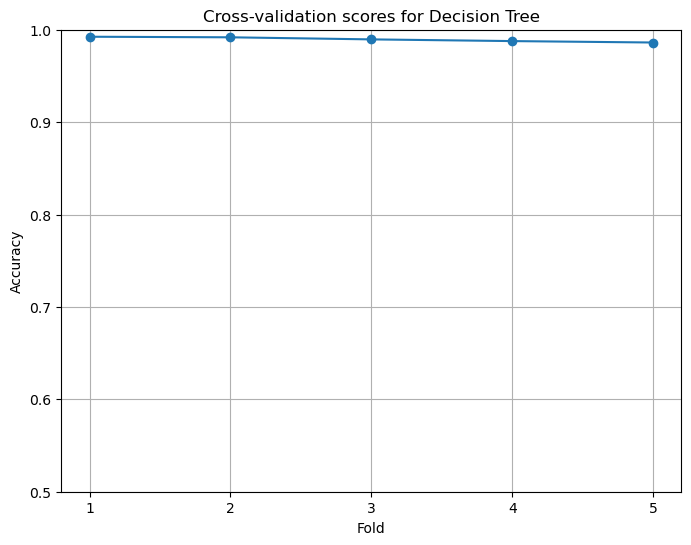

C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

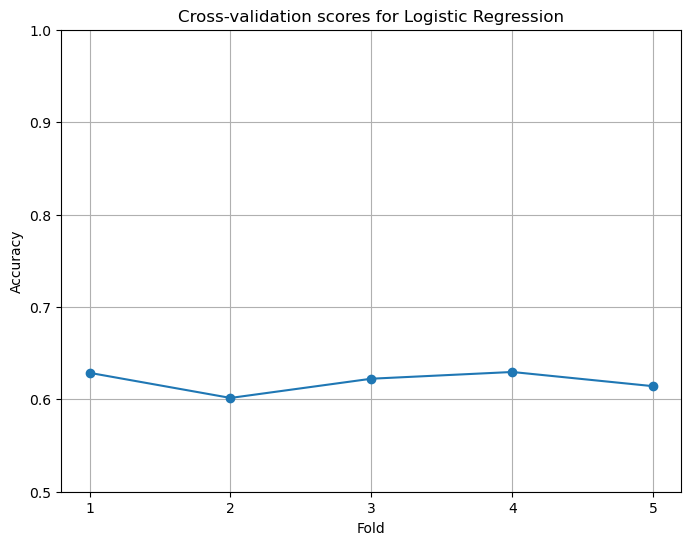

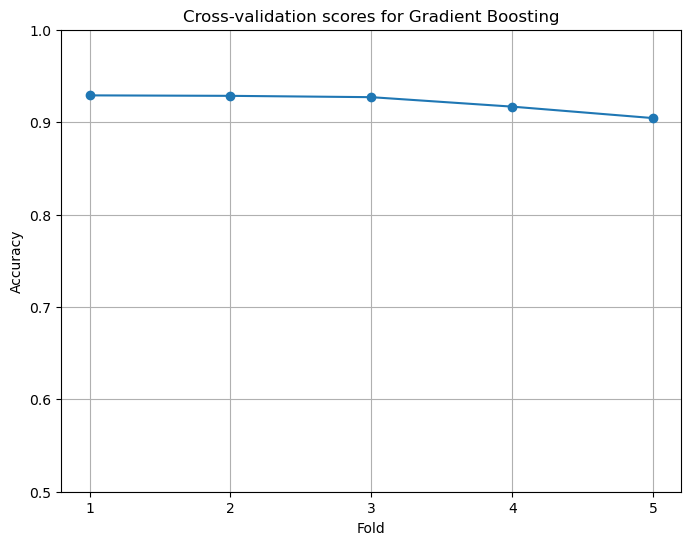

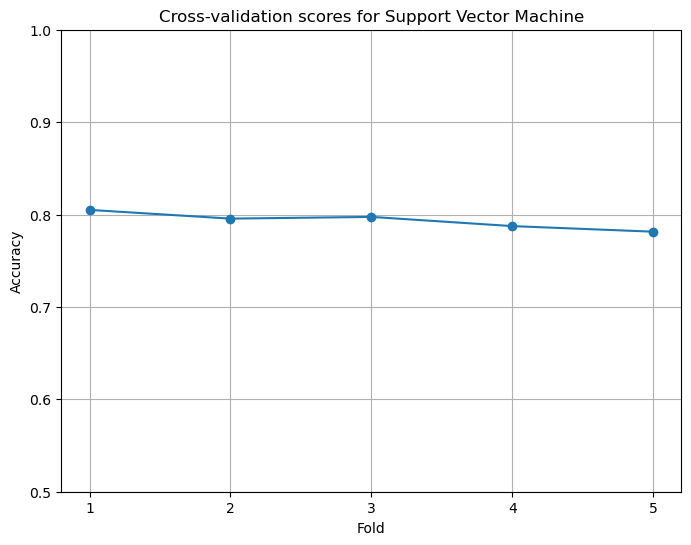

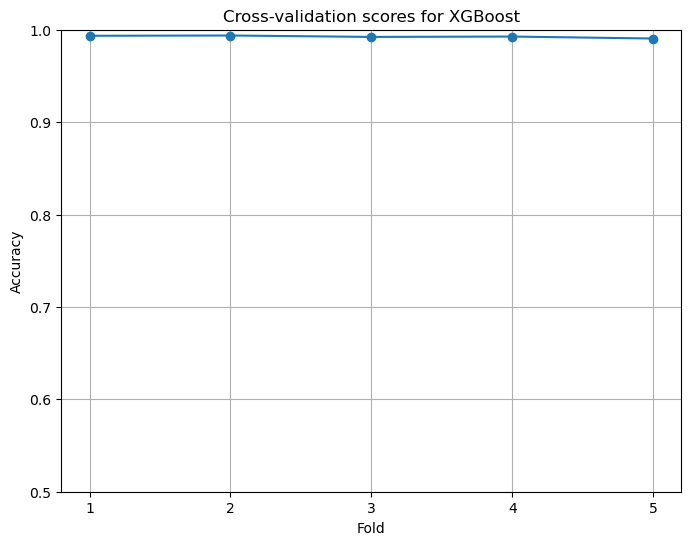

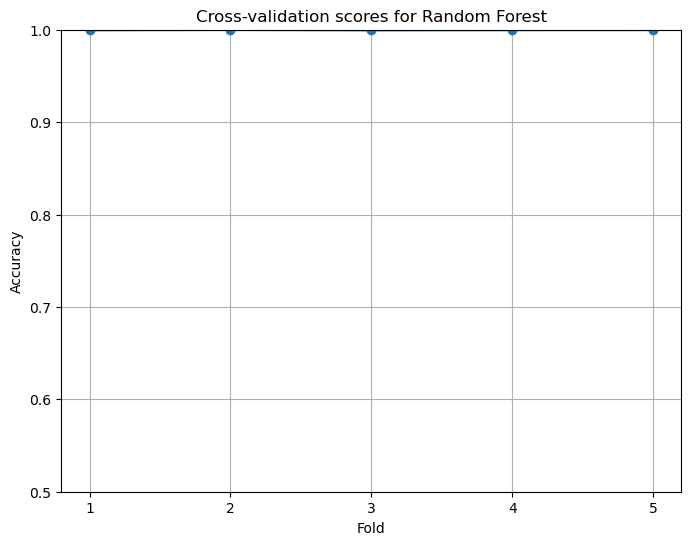

In [38]:
# Handle missing values by imputing with mean 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Set the number of folds for cross-validation
num_folds = 5

# Perform cross-validation and plot results for each classifier separately
for name, clf in classifiers.items():
    # Initialize a figure for each classifier
    plt.figure(figsize=(8, 6))
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(clf, X_imputed, y, cv=num_folds, scoring='accuracy')
    
    # Plot cross-validation results for each fold
    plt.plot(range(1, num_folds + 1), scores, marker='o')
    
    # Plot settings and labels
    plt.title(f'Cross-validation scores for {name}')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.0)  # Set y-axis limit for better visualization
    plt.xticks(range(1, num_folds + 1))
    plt.grid(True)
    plt.show()